In [3]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [4]:
#32 sites
file_name = '2023_01_*.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/1_30_23/'+file_name))
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [5]:
selected_data = []
for i in range(len(data)):
    if len(np.array(data[i]['nT'])[:,1]) == 194 and data[i]['params']['Delta_fin']<3 :
        selected_data.append(data[i])
selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['Delta_fin'])   # sort by age
# for i in range(len(selected_data)):
#     print(i,selected_data[i]['params']['Delta_fin'],len(np.array(selected_data[i]['nT'])[:,1]))
N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('U',selected_data[i]['params']['Delta_fin'])
    print(zzg_list[i].shape)
print(selected_data[i]['params'])

i 0
U 0.5
(194, 24, 24)
i 1
U 0.75
(194, 24, 24)
i 2
U 1.0
(194, 24, 24)
i 3
U 1.25
(194, 24, 24)
i 4
U 1.3
(194, 24, 24)
i 5
U 1.35
(194, 24, 24)
i 6
U 1.4
(194, 24, 24)
i 7
U 1.45
(194, 24, 24)
i 8
U 1.5
(194, 24, 24)
i 9
U 1.5
(194, 24, 24)
i 10
U 1.53
(194, 24, 24)
i 11
U 1.55
(194, 24, 24)
i 12
U 1.57
(194, 24, 24)
i 13
U 1.6
(194, 24, 24)
i 14
U 1.62
(194, 24, 24)
i 15
U 1.65
(194, 24, 24)
i 16
U 1.68
(194, 24, 24)
i 17
U 1.7
(194, 24, 24)
i 18
U 1.75
(194, 24, 24)
i 19
U 1.8
(194, 24, 24)
i 20
U 2.0
(194, 24, 24)
i 21
U 2.5
(194, 24, 24)
{'dirc': '/n/home03/bye/tenpy_squeezing/workfolder_yu/output_cluster/', 'L': 24, 'Omega': 1.5, 'U': 8.0, 'chi': 128, 'N_steps': 1, 'Rabi_ramp_time': 2.0, 'Rabi_ramp_dt': 0.1, 'quench_time': 1.0, 'quench_dt': 0.05, 'Delta_ini': -5.0, 'Delta_fin': 2.5, 'dt': 0.052, 'evolve_time': 8.0}


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


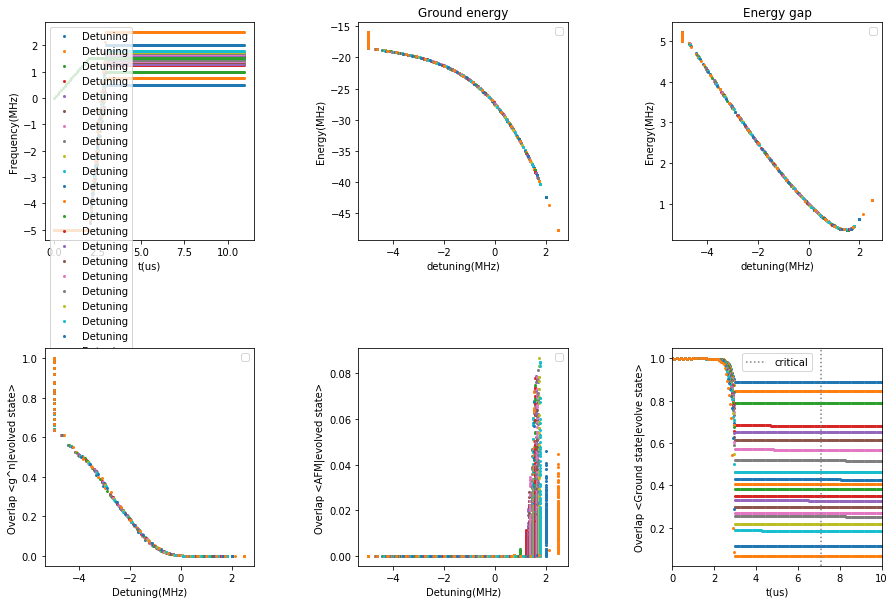

In [65]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(N)):
    #label0 ='V = '+ str(int(selected_data[i]['params']['Delta_fin']))+'MHz'
    label0 = ''
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 )
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0)
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

ax[1,2].set_xlim([0,10])


ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



In [8]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)

Text(0.5, 0, 'MHz')

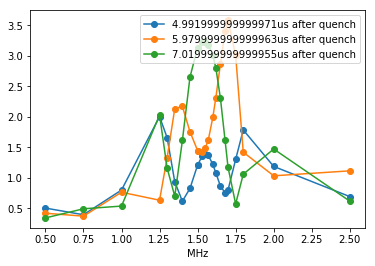

In [9]:
t_list = [8,9,10]
for i_t in range(len(t_list)):
    Delta_fin_list = []
    order_parameter = []
    for i_n,i in enumerate(range(len(N))):
        Delta_fin_list.append(selected_data[i]['params']['Delta_fin'])
        t_id = np.argmin(abs(t[i]-t_list[i_t]))
        temp = sigma_2_list[i]
        order_parameter.append(np.sum(temp,axis=1)[t_id])
    plt.plot(Delta_fin_list,order_parameter,marker = 'o',label = str(t[i][t_id]-3)+'us after quench')
plt.legend()
plt.xlabel('MHz')

Text(0.5, 0, 't(us)')

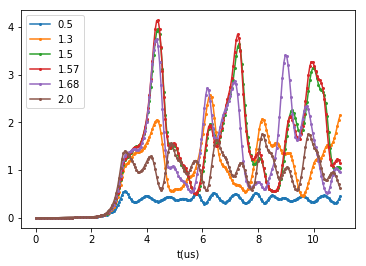

In [19]:
order_parameter = []
for i_n,i in enumerate(range(len(N))):
    temp = sigma_2_list[i]
    order_parameter.append(np.sum(temp,axis=1)[:])
j = np.arange(0,len(Delta_fin_list),4)
for j_n in j:
    plt.plot(t[j_n],order_parameter[j_n],marker = 'o',label = Delta_fin_list[j_n],markersize =2)
plt.legend()
plt.xlabel('t(us)')

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [89]:
np.shape(order_parameter)

(22, 194)